In [1]:
#!pip install pandas 
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import copy
import matplotlib.pyplot as plt

import numpy as np
#import pandas as pd
from lvis import LVIS

In [20]:
config_file = 'configs/custom/faster_rcnn_r50_fpn_1x_lvis_center.py'
checkpoint_file = './work_dirs/gs_faster_rcnn_r50_fpn_1x_lvis_with0_bg8_center_loss_whole_lambda1/epoch_8.pth'
# model = init_detector(config_file, checkpoint_file, device='cuda:0')
model = init_detector(config_file, checkpoint_file, device='cpu')


Step 0
Step 1
Step 3
Step 4
Step 5
Step 6


In [21]:
m[0]

tensor([1, 1, 1,  ..., 1, 1, 0])

In [4]:
import torch
i = 0
m = torch.load('./data/lvis_v1/label2binlabel.pt')
centers = model.roi_head.bbox_head.loss_center_bins[i].centers
print(centers.shape, m.shape)

torch.Size([2, 1024]) torch.Size([5, 1204])


In [13]:
X = []
labels = []

i = 0
centers = model.roi_head.bbox_head.loss_center_bins[i].centers
X.append(centers[0].detach().cpu().numpy())
labels.append(1203)

for i in range(1,5):
    centers = model.roi_head.bbox_head.loss_center_bins[i].centers
    for index,target in enumerate(m[i]):
        #print(index,target.numpy())
        if target != 0:
            center = centers[target]
            label = index
            X.append(center.detach().cpu().numpy())
            labels.append(label)
X = np.array(X)
labels = np.array(labels)

# np.save('./data/lvis_v1/centersX.npy',X)
np.save('./data/lvis_v1/centersY.npy',labels)

In [14]:
np.sum(labels == 1203)

1

In [2]:
config_file = './configs/custom/faster_rcnn_r50_fpn_1x_lvis_center.py'
checkpoint_file = 'work_dirs/gs_faster_rcnn_r50_fpn_1x_lvis_with0_bg8_center_loss_whole_entire_lambda01/epoch_12.pth'
# model = init_detector(config_file, checkpoint_file, device='cuda:0')
model = init_detector(config_file, checkpoint_file, device='cpu')


Step 0
Step 1
Step 3
Step 4
Step 5
Step 6


In [3]:
import torch
centers = model.roi_head.bbox_head.loss_center.centers
print(centers.shape)

torch.Size([1204, 1024])


In [4]:
X = centers.detach().cpu().numpy()
labels = np.arange(0,1204)

In [5]:
np.save('./data/lvis_v1/centersX_whole_entire_lambda01.npy',X)
np.save('./data/lvis_v1/centersY_whole_entire_lambda01.npy',labels)

In [2]:
import numpy as np
X = np.load('./data/lvis_v1/centersX_whole.npy')
y = np.load('./data/lvis_v1/centersY_whole.npy')

In [34]:
np.append(X[:2],X[-1:],axis=0).shape


(3, 1024)

In [43]:
runningCenters = np.load('./data/lvis_v1/runningCenters.npy')
counts = np.load('./data/lvis_v1/runningCentersCount.npy')

In [9]:
cents = runningCenters
for i in range(len(cents)):
    cents[i] = cents[i] / counts[i]

/cephfs-team2/venv/trial_vv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
np.linalg.norm(X[100]-X[1])

41.462223

In [4]:
import torch
import numpy as np
a = np.zeros((4,5))

In [5]:
b = None

In [8]:
if b is None:
    b = a
else: b = np.append(b,a,axis=0)

In [42]:
features = np.load('./data/lvis_v1/featuresToSave.npy')
labels = np.load('./data/lvis_v1/labelsToSave.npy')

In [6]:
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)


In [7]:
n_components = 2
perplexity = 30

In [8]:
tsne = TSNE(n_components=2, random_state=0)

In [9]:
X_2d = tsne.fit_transform(features)
X_2d.shape



(56076, 2)

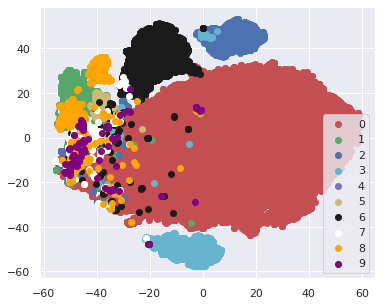

In [41]:
y = labels
target_ids = [9,8,7,6,5,4,3,2,1,0]

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple','g'
for i, c, label in zip(target_ids, colors, ['0','1','2','3','4','5','6','7','8','9']):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [13]:
centers = np.zeros((10,1024))
for i in range(len(features)):
    centers[labels[i]] += features[i]
for i in range(10):
    centers[i] = centers[i] / np.sum(labels==i)

In [15]:
runningCenters = np.load('./data/lvis_v1/runningCenters.npy')
counts = np.load('./data/lvis_v1/runningCentersCount.npy')

In [57]:
scores = np.ones((features.shape[0], 10))

17.810978792990973

In [59]:
features.shape

(56076, 1024)

In [60]:
knn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(centers)
distances, indices = knn.kneighbors(features)


In [38]:
correct = np.zeros(10)
total = np.zeros(10)
for i in range(len(labels)):
    total[labels[i]] += 1
    if labels[i] == indices[i]:
        correct[labels[i]] += 1
        

In [71]:
from scipy.special import softmax

scores = softmax(-distances, axis=1)


In [80]:
indices

array([[9, 0, 2, ..., 8, 3, 6],
       [9, 0, 2, ..., 8, 3, 6],
       [9, 0, 2, ..., 8, 3, 6],
       ...,
       [9, 5, 0, ..., 7, 6, 3],
       [5, 0, 2, ..., 7, 6, 3],
       [5, 0, 2, ..., 7, 6, 3]])

In [82]:
from sklearn.metrics import pairwise_distances

In [84]:
d = pairwise_distances(features,centers)

In [88]:
scores = softmax(-d, axis=1)


In [93]:
np.sum(np.argmax(scores,axis=1) == labels)/len(labels)

0.7808509879449319

In [87]:
distances[0]

array([10.46675345, 16.59106214, 17.19026956, 17.32939261, 17.38980766,
       17.44102708, 17.78803552, 17.81097879, 18.06436843, 18.90699508])